<a href="https://colab.research.google.com/github/DevBatra05/AIML_Sem_4/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold

In [4]:
from google.colab import files
ss=files.upload()


Saving employee_data.csv to employee_data.csv


In [6]:
# -------------------- Load the Employee Dataset --------------------
data = pd.read_csv('employee_data.csv')

No missing values detected.


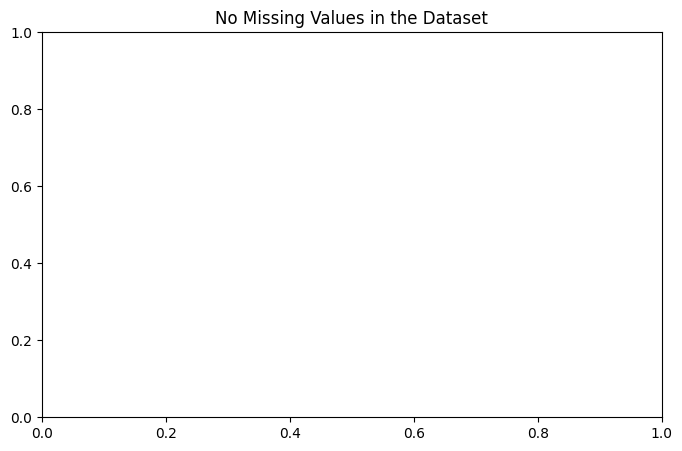

In [7]:
# Check for missing values
missing_percent = data.isnull().mean() * 100
plt.figure(figsize=(8, 5))
if missing_percent.sum() > 0:
    print("Missing values found, plotting missing values...")
    sns.barplot(x=missing_percent[missing_percent > 0].index,
                y=missing_percent[missing_percent > 0].values,
                palette='Blues_d')
    plt.title('Percentage of Missing Values by Feature')
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Impute missing values
    data.fillna(data.median(), inplace=True)
    print("Missing values imputed.")
else:
    print("No missing values detected.")
    plt.title('No Missing Values in the Dataset')
    plt.show()

In [8]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows. Removing duplicates.")
    data.drop_duplicates(inplace=True)
print(f"Data shape after cleaning: {data.shape}")

Data shape after cleaning: (20, 5)


In [9]:
# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [10]:
# Normalize numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = StandardScaler().fit_transform(data[numerical_cols])

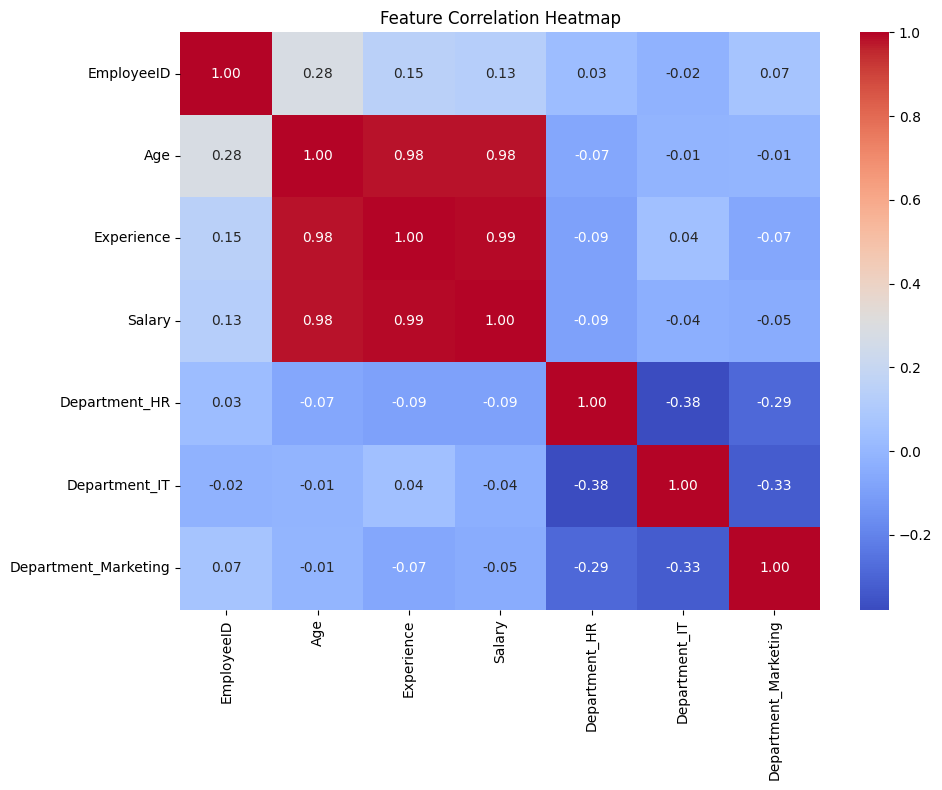

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

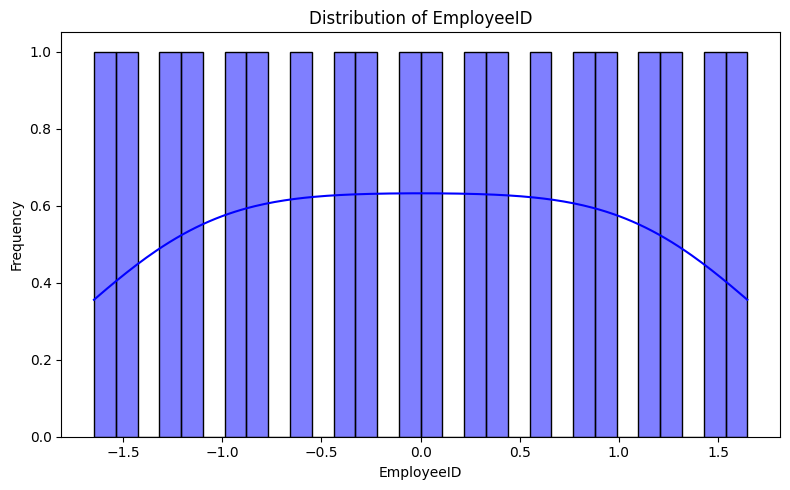

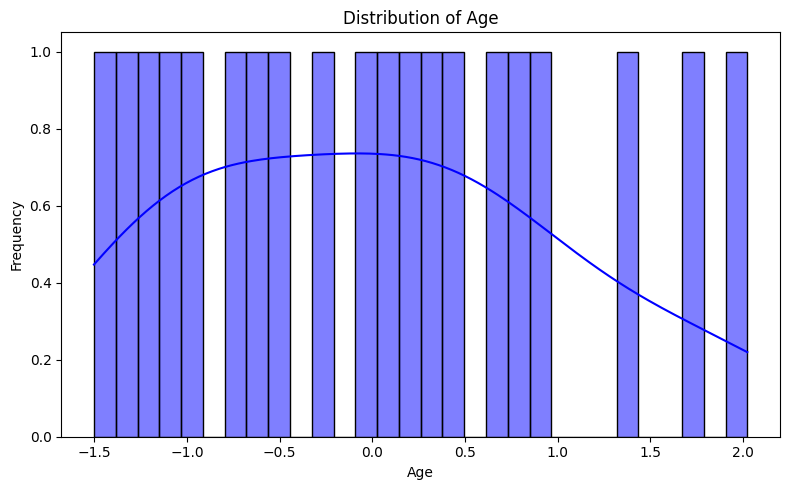

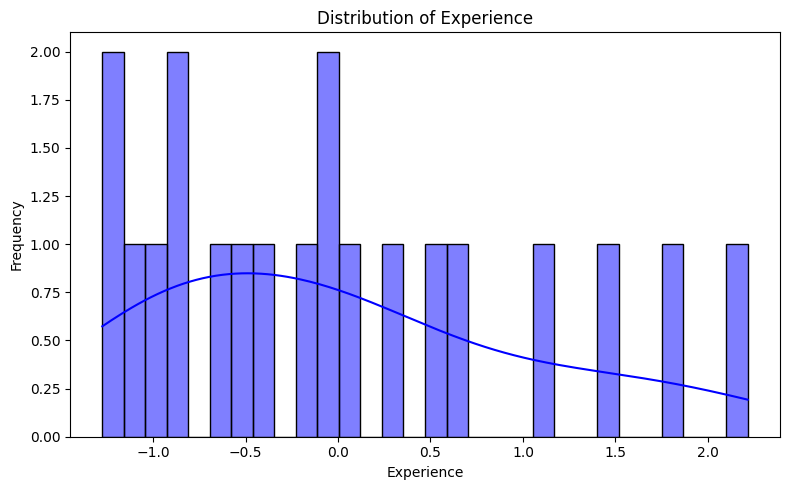

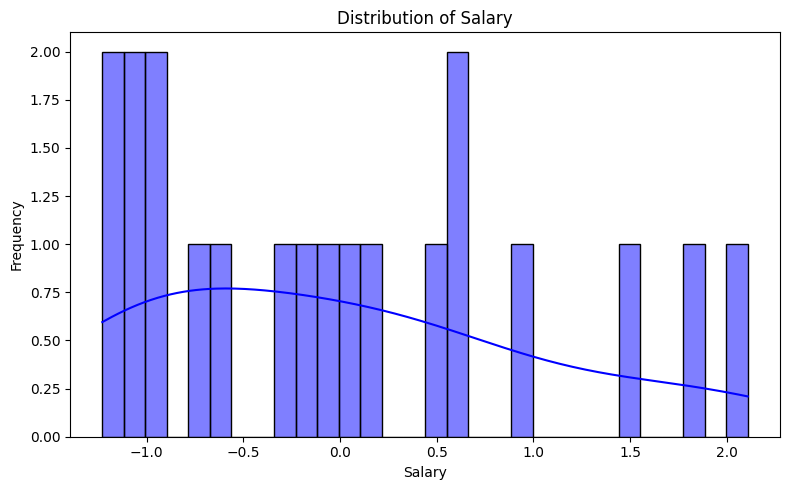

In [12]:
# Visualize numerical feature distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [13]:
# Variance thresholding to remove low-variance features
selector = VarianceThreshold(threshold=0.01)
features = data.iloc[:, :-1]  # Assuming last column is target
reduced_features = selector.fit_transform(features)
selected_columns = features.columns[selector.get_support(indices=True)]

In [14]:
# Update the data with reduced features
data = pd.DataFrame(reduced_features, columns=selected_columns)
data['Target'] = data.iloc[:, -1]  # Adjust target column as needed

print(f"Number of features after variance thresholding: {data.shape[1] - 1}")

Number of features after variance thresholding: 6


In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=features.columns, y=variances.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Feature Variances')
plt.tight_layout()
plt.show()

NameError: name 'variances' is not defined

<Figure size 1000x500 with 0 Axes>

In [16]:
# Split into features (X) and target (y)
X = data.drop(columns=['Target'])
y = data['Target']